In [52]:
from flood import FloodFill
import numpy as np
import time 
from tqdm import trange 
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
# Load in data 
adj =  np.genfromtxt('adj.csv', delimiter=',',dtype=np.int32)
data = np.genfromtxt('data.csv', delimiter=',')

In [8]:
# Instantiate FloodFill and recording variables
spk_detector = FloodFill(data, adj)
N = 100 
times = []

In [9]:
# Profile detect_spikes 
for i in (t := trange(N)):
    start = time.time()
    spk_detector.detect_spikes()
    end = time.time()
    times.append(end-start)
    t.set_description("Time took %f" % (end-start) )

Time took 6.181549: 100%|██████████| 100/100 [09:47<00:00,  5.88s/it]


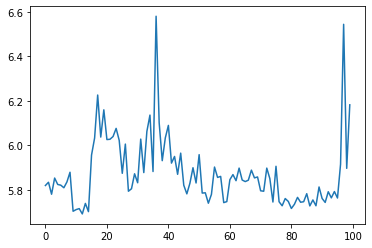

In [13]:
plt.plot(times)
plt.show()

In [14]:
spks = spk_detector.detect_spikes()

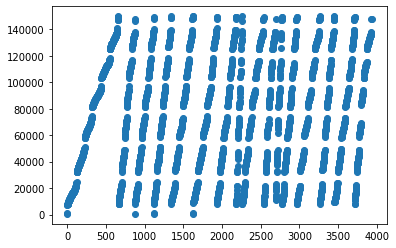

In [27]:
spkTimes = np.asarray([spk[0] for spk in spks])
spkLocs = np.asarray([spk[1] for spk in spks])
plt.scatter(np.arange(spkTimes.shape[0]), spkTimes)

In [59]:
from matplotlib.pyplot import figure
figure(figsize=(100,100), dpi= 100)
plt.plot(data[:,0])
plt.scatter(spkTimes[0:800], np.ones(800)*-100)